<br>
<img src="data/airbnb_logo.png" alt="Logo de Airbnb" style="width:300px"/><br>

# **Airbnb Case**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: ggalvanjorge@gmail.com

---
## **Análisis exploratorio de datos (EDA)**

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura del dataset
df_listings = pd.read_csv('./data/listings_clean.csv')
df_listings = df_listings.drop('Unnamed: 0', axis='columns') # Eliminación de la columna 'Unnamed: 0'

### **7 - Análisis de outliers en la variable 'price'**

#### 7.1 - Distribución de los outliers de precio

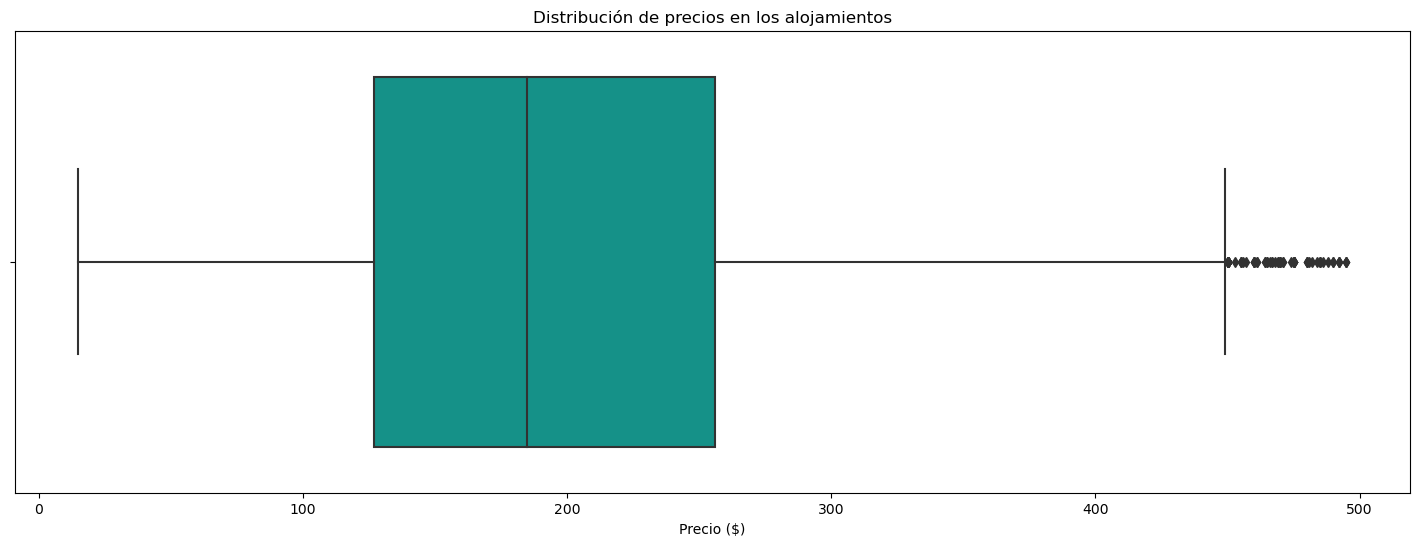

In [3]:
# Boxplot con la distribución del precio
sns.boxplot(x=df_listings['price'], color='#00A699')

# Título y etiquetas de los ejes
plt.title('Distribución de precios en los alojamientos')
plt.xlabel('Precio ($)')

plt.gcf().set_size_inches(18,6) # Ajuste del tamaño del gráfico

#### 7.2 - Eliminación de outliers

In [4]:
# Primer cuartil y tercer cuartil para definir el rango intercuartílico (IQR)
Q1 = df_listings['price'].quantile(0.25)
Q3 = df_listings['price'].quantile(0.75)
IQR = Q3 - Q1

# Valor mínimo y máximo que delimita el rango típico de precios
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

# Condiciones para identificar los outliers
cond_outliers_1 = df_listings['price'] >= limite_inferior
cond_outliers_2 = df_listings['price'] <= limite_superior 

# Eliminación de los outliers
df_listings = df_listings[cond_outliers_1 & cond_outliers_2]

#### 7.3 - Distribución de precios sin outliers

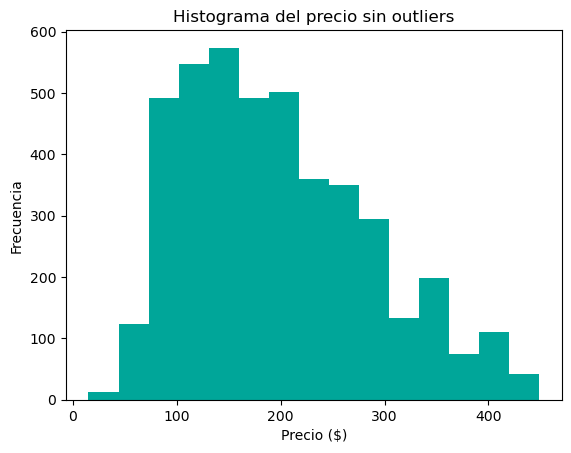

In [5]:
# Histograma con la distribución del precio sin outliers
plt.hist(df_listings['price'], bins=15, color='#00A699')

# Título y etiquetas de los ejes
plt.title('Histograma del precio sin outliers')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')

plt.show()

### **8 - Correlación entre variables numéricas**

#### 8.1 - Matriz de correlación entre variables numéricas

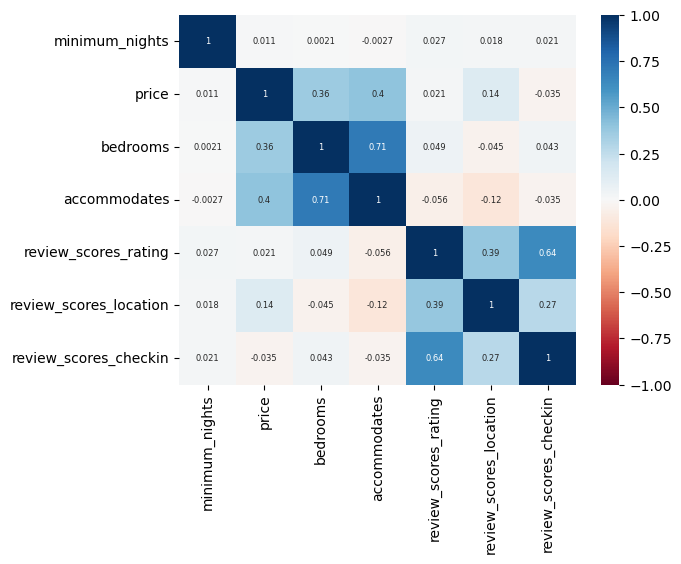

In [6]:
numerical = df_listings.select_dtypes(exclude = 'object') # Selección de variables numéricas
numerical = numerical.loc[:, ~numerical.columns.isin(['id', 'host_id', 'latitude', 'longitude'])] # Exclusión de las variables de id, latitud y longitud

# Matriz de correlación
corr_matrix = numerical.corr()

# Mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', annot_kws={"size": 6}, vmin=-1);

### **9 - Análisis por barrio, tipo de habitación y propietario**

#### 9.1 - Barrios con más viviendas en alquiler

In [7]:
# Barrios más populares en términos de cantidad de viviendas en alquiler
df_neighbourhood_cleansed = df_listings['neighbourhood_cleansed'].value_counts()
df_neighbourhood_cleansed.to_frame().head(5)

,neighbourhood_cleansed
De Baarsjes - Oud-West,610
Centrum-West,563
De Pijp - Rivierenbuurt,448
Centrum-Oost,420
Westerpark,264


#### 9.2- Tipo de habitación más frecuente

In [8]:
# Recuento de cada tipo de habitación, ordenado de mayor a menor
df_room_type = df_listings['room_type'].value_counts().sort_values(ascending=False)
df_room_type.to_frame()

,room_type
Entire home/apt,2884
Private room,1345
Hotel room,49
Shared room,29


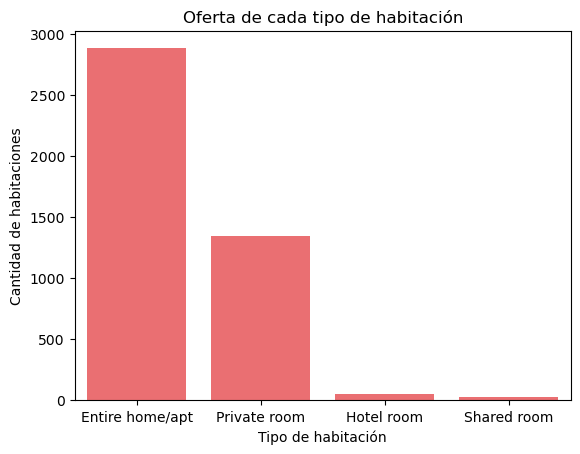

In [9]:
# Gráfico de barras con la oferta de cada tipo de habitación
sns.countplot(x = df_listings['room_type'], order=df_room_type.index, color='#FF5A5F')

# Título y etiquetas de los ejes
plt.title('Oferta de cada tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad de habitaciones')

plt.show()

#### 9.3 - Propietarios con más viviendas en alquiler

In [10]:
# Id de los propietarios con más viviendas en alquiler
df_host_id = df_listings['host_id'].value_counts()
df_host_id.to_frame().head(5)

,host_id
14574533,20
67005410,17
203731852,16
245267147,12
21167882,12


In [11]:
# Exportación del dataset
df_listings.to_csv('./data/listings_clean.csv')